In [1]:
%%capture

!pip install tqdm

In [2]:
import os
import random
from tqdm import tqdm
from datetime import date
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.metrics import Metric

In [3]:
audio_folder = "/content/drive/MyDrive/Colab Notebooks/aud-ml-datasets/wav-audios/"
transcription_filepath = "/content/drive/MyDrive/Colab Notebooks/aud-ml-datasets/transcriptions-audios-colab.xlsx"

# **Transcripts**

In [4]:
# Twi Alphabet :: AaBbDdEeƐɛFfGgHhIiKkLlMmNnOoƆɔPpRrSsTtUuWwYy

In [5]:
# Read transcription file
transcription_df = pd.read_excel(transcription_filepath)

In [6]:
# Read transcription file
transcription_df = pd.read_excel(transcription_filepath)

In [7]:
transcription_df.shape

(7514, 17)

In [8]:
transcription_df.head(5)

,unamed,File No.,IMAGE_PATH,IMAGE_SRC_URL,AUDIO_PATH,Transcriptions,SPEAKER_ID,ORG_NAME,PROJECT_NAME,LOCALE,GENDER,AGE,DEVICE,ENVIRONMENT,YEAR,Full Filename,Filename
0,1030,5599,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Funu adaka si fam. Mmeranteɛ ne mmabaawa bi te...,4625,University of Ghana,Waxal,ak_gh,Female,25,INFINIX MOBILITY LIMITED Infinix X690,Indoor,2023,ak_gh_image_0001_u238_1_1680183655166_05599,ak_gh_image_0001_u238_1_1680183655166.mp3
1,2724,2435,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Aborɔfokuo bi abɔ dɔnpem wɔ asieyɛ. Ɛfunu adak...,5097,University of Ghana,Waxal,ak_gh,Female,25,samsung SM-G960U,Indoor,2023,ak_gh_image_0001_u709_1_1681976769788_02435,ak_gh_image_0001_u709_1_1681976769788.mp3
2,2278,1,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,"Nnipadɔm bi atwa ahyia wɔ beaeɛ bi, na efunu a...",76,University of Ghana,Waxal,ak_gh,Male,66,samsung SM-J410F,Indoor,2023,ak_gh_image_0001_u11919_2_1688630906868_00001,ak_gh_image_0001_u11919_2_1688630906868.mp3
3,2406,3167,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Nnipa bebree gyina hɔ wɔhyɛ ataade tuntum. Bin...,17,University of Ghana,Waxal,ak_gh,Female,21,TECNO MOBILE LIMITED TECNO KE5,Indoor,2023,ak_gh_image_0001_u133_1_1687352121107_03167,ak_gh_image_0001_u133_1_1687352121107.mp3
4,1367,6332,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Nnipa bebree ahyia mu wɔ beaeɛ baako. Bebree n...,21,University of Ghana,Waxal,ak_gh,Female,20,TECNO MOBILE LIMITED TECNO KE5,Indoor,2023,ak_gh_image_0001_u177_1_1687363796955_06332,ak_gh_image_0001_u177_1_1687363796955.mp3


In [9]:
transcription_df['lower-transcriptions'] = transcription_df['Transcriptions'].str.lower().str.strip()

In [10]:
transcription_df.head(5)

,unamed,File No.,IMAGE_PATH,IMAGE_SRC_URL,AUDIO_PATH,Transcriptions,SPEAKER_ID,ORG_NAME,PROJECT_NAME,LOCALE,GENDER,AGE,DEVICE,ENVIRONMENT,YEAR,Full Filename,Filename,lower-transcriptions
0,1030,5599,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Funu adaka si fam. Mmeranteɛ ne mmabaawa bi te...,4625,University of Ghana,Waxal,ak_gh,Female,25,INFINIX MOBILITY LIMITED Infinix X690,Indoor,2023,ak_gh_image_0001_u238_1_1680183655166_05599,ak_gh_image_0001_u238_1_1680183655166.mp3,funu adaka si fam. mmeranteɛ ne mmabaawa bi te...
1,2724,2435,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Aborɔfokuo bi abɔ dɔnpem wɔ asieyɛ. Ɛfunu adak...,5097,University of Ghana,Waxal,ak_gh,Female,25,samsung SM-G960U,Indoor,2023,ak_gh_image_0001_u709_1_1681976769788_02435,ak_gh_image_0001_u709_1_1681976769788.mp3,aborɔfokuo bi abɔ dɔnpem wɔ asieyɛ. ɛfunu adak...
2,2278,1,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,"Nnipadɔm bi atwa ahyia wɔ beaeɛ bi, na efunu a...",76,University of Ghana,Waxal,ak_gh,Male,66,samsung SM-J410F,Indoor,2023,ak_gh_image_0001_u11919_2_1688630906868_00001,ak_gh_image_0001_u11919_2_1688630906868.mp3,"nnipadɔm bi atwa ahyia wɔ beaeɛ bi, na efunu a..."
3,2406,3167,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Nnipa bebree gyina hɔ wɔhyɛ ataade tuntum. Bin...,17,University of Ghana,Waxal,ak_gh,Female,21,TECNO MOBILE LIMITED TECNO KE5,Indoor,2023,ak_gh_image_0001_u133_1_1687352121107_03167,ak_gh_image_0001_u133_1_1687352121107.mp3,nnipa bebree gyina hɔ wɔhyɛ ataade tuntum. bin...
4,1367,6332,Akan/images/0001.jpg,https://live.staticflickr.com/7846/46666781031...,Akan\selected transcribed audios\audios\ak_gh_...,Nnipa bebree ahyia mu wɔ beaeɛ baako. Bebree n...,21,University of Ghana,Waxal,ak_gh,Female,20,TECNO MOBILE LIMITED TECNO KE5,Indoor,2023,ak_gh_image_0001_u177_1_1687363796955_06332,ak_gh_image_0001_u177_1_1687363796955.mp3,nnipa bebree ahyia mu wɔ beaeɛ baako. bebree n...


In [11]:
# transcription_df['char-count'] =  len(transcription_df['lower-transcriptions'].str)

In [12]:
labels_uniq = [sentence for sentence in transcription_df['lower-transcriptions']]

## **Encoding transcript tokens**

In [13]:
class TextTransform:
    def __init__(self):
        self.char_to_num_dict =  {
      "а": 1, "b": 2, "d": 3, "e": 4, "ɛ": 5, "f": 6, "g": 7, "h": 8, "i": 9, "k": 10, "l": 11,
      "m": 12, "n": 13, "o": 14, "ɔ": 15, "p": 16, "r": 17, "s": 18, "t": 19, "u": 20, "w": 21,
      "y": 22, " ": 23}

        self.index_map = {}
        for key, value in self.char_to_num_dict.items():
            self.index_map[value] = key


    # Encode Character to Numbers
    def char_to_num(self, sentence):
        num_sent = np.zeros(5000) #number of characters of the longest text <==> 416, 5000
        i = 0
        for char in sentence.lower():
            if char in self.char_to_num_dict.keys():
                num_sent[i]=self.char_to_num_dict[char]
            i += 1
        return num_sent

    # Decode Character to Numbers
    def num_to_char(self, sentence):
        char_sent = np.array()
        i = 0
        for num in sentence:
            char_sent[i]=self.index_map[num]
            i += 1
        return char_sent



In [14]:
text_transform = TextTransform()

labels = []
for label in labels_uniq:
    labels.append(label)
    labels.append(label)

labels = list(map(text_transform.char_to_num, labels))

In [15]:
type(labels)

list

In [16]:
%%capture
labels

# **Audio**

In [17]:
# Function to load audio using librosa

def load_audio(audio_filepath):
    audio, sample_rate = librosa.load(audio_filepath, sr=None, mono=True)

      # Print the shape of the audio waveform and the sample rate
    print("Audio Shape:", audio.shape)
    print("Sample Rate:", sample_rate)


    return audio, sample_rate

In [18]:
def play_audio(audio_filepath):
  return ipd.Audio(f"{audio_filepath}")

In [19]:
# Get audio file names
audio_files = os.listdir(audio_folder)
# audio_files

In [20]:
number_of_audios = len(audio_files)
print(f"Number of audio files: {number_of_audios}")

Number of audio files: 7514


### **Inspecting Random Audio Samples**

In [21]:
# Selecting a random audio file
random_audio_filename = random.choice(audio_files)
random_audio_filename

'ak_gh_image_0133_u1238_1_1682372349018_10643.wav'

In [22]:
random_audio_filepath = f"{audio_folder}{random_audio_filename}"
random_audio_filepath

'/content/drive/MyDrive/Colab Notebooks/aud-ml-datasets/wav-audios/ak_gh_image_0133_u1238_1_1682372349018_10643.wav'

In [23]:
play_audio(random_audio_filepath)

In [24]:
sample_audio, samp_rate = load_audio(random_audio_filepath)

Audio Shape: (318311,)
Sample Rate: 16000


In [25]:
duration = librosa.get_duration(path=f"{random_audio_filepath}")
print(f"The duration of the audio is {duration} ")

The duration of the audio is 19.8944375 


## **Waveform**

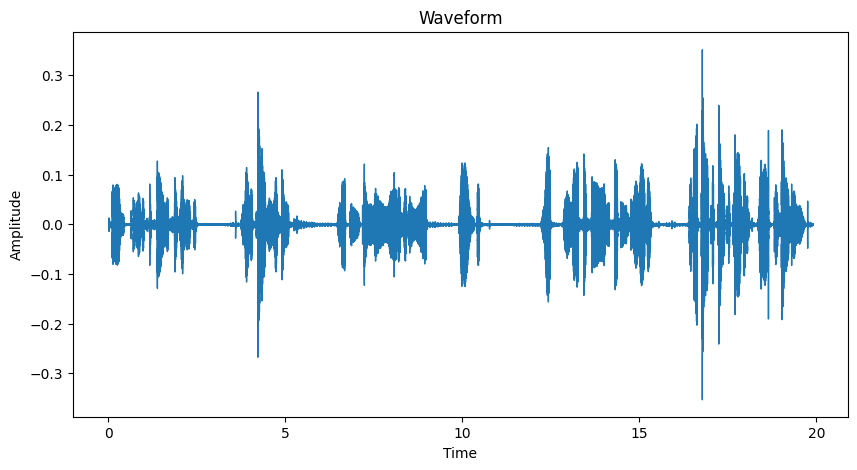

In [26]:
# Waveplot to  know the loudness of the audio at a given time

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 5))

librosa.display.waveshow(sample_audio, sr=samp_rate)

# Set the title of the plot
plt.title('Waveform')
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Show the plot
plt.show()

## **MelSpectogram**

In [27]:
def imageSpecificatons(ms_feature):
    fig, ax = plt.subplots()
    ms_dB = librosa.power_to_db(ms_feature, ref=np.max)
    print(ms_feature.shape)
    img = librosa.display.specshow(ms_dB, x_axis='time', y_axis='mel', ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram');



def wav2melSpec(AUDIO_PATH):
    audio, sr = librosa.load(AUDIO_PATH)
    return librosa.feature.melspectrogram(y=audio, sr=sr)



def get_audio_info(path, show_melspec=False, label=None):
    spec = wav2melSpec(path)
    if label is not None:
        print("Label:", label)
    if show_melspec is not False:
        imageSpecificatons(spec)

(128, 857)


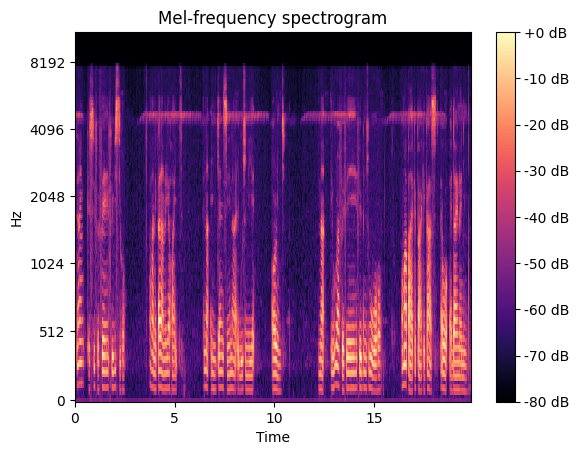

In [28]:
get_audio_info(random_audio_filepath, show_melspec=True)

## **Audio Preprocessing**

In [29]:
def audioEncoder(audio_wave, max_len=None, number_MFCC_features=14, sampling_rate=16000):
    # Compute MFCC features
    mfcc = librosa.feature.mfcc(y=audio_wave, n_mfcc=number_MFCC_features, sr=sampling_rate)

    # Determine the length to use for MFCC features
    if max_len is not None:
        # If max_len is specified, apply padding or truncation
        if max_len > mfcc.shape[1]:
            # Pad MFCC features with zeros to match max_len
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            # Truncate MFCC features to max_len
            mfcc = mfcc[:, :max_len]

    return mfcc

In [30]:
files_in_dir = os.listdir(audio_folder)

In [31]:
mfcc_spec_values = []

In [32]:
for file_name in tqdm(files_in_dir):
    audio_path = os.path.join(audio_folder, file_name)

    # Load the audio file and extract the audio waveform and sampling rate
    audio_waveform, sr = librosa.load(audio_path, sr=None)

    # Compute MFCC features for the original audio waveform
    original_mfcc = audioEncoder(audio_waveform, max_len=2000)

    # Expand dimensions to create a spectrogram (MFCC representation) for the original audio
    original_spectrogram = np.expand_dims(original_mfcc, -1)

    # Append the original MFCC spectrogram to the list of spectrograms
    mfcc_spec_values.append(original_spectrogram)

    # Apply pitch shifting to the audio waveform
    pitch_shifted_waveform = librosa.effects.pitch_shift(audio_waveform, sr=16000, n_steps=10)

    # Compute MFCC features for the pitch-shifted audio waveform
    shifted_mfcc = audioEncoder(pitch_shifted_waveform, max_len=2000)

    # Expand dimensions to create a spectrogram (MFCC representation) for the pitch-shifted audio
    shifted_spectrogram = np.expand_dims(shifted_mfcc, -1)

    # Append the pitch-shifted MFCC spectrogram to the list of spectrograms
    mfcc_spec_values.append(shifted_spectrogram)


100%|██████████| 7514/7514 [1:13:33<00:00,  1.70it/s]


In [33]:
mfcc_values_array = np.array(mfcc_spec_values)
print("Shape of mfcc_values:", mfcc_values_array.shape)

# mfcc_spectograms

Shape of mfcc_values: (15028, 14, 2000, 1)


## **Splitting Datasets**

In [34]:
def cut_array(text_arr):
    return text_arr[:1756]

# Split data into train and test sets
audio_train, text_train = np.array(mfcc_spec_values[:3800]), np.array(list(map(cut_array, labels[:3800])))
audio_test, text_test = np.array(mfcc_spec_values[3800:]), np.array(list(map(cut_array, labels[3800:])))

# Min-Max normalization for audio_train
min_value = np.min(audio_train)
max_value = np.max(audio_train)
audio_train_normalized = (audio_train - min_value) / (max_value - min_value)

# Min-Max normalization for audio_test
audio_test_normalized = (audio_test - min_value) / (max_value - min_value)

In [35]:
print(audio_train.shape, audio_train_normalized.shape, text_train.shape, audio_test.shape, audio_test_normalized.shape, text_test.shape)

(3800, 14, 2000, 1) (3800, 14, 2000, 1) (3800, 1756) (11228, 14, 2000, 1) (11228, 14, 2000, 1) (11228, 1756)


## **Convolutional Neural Network [CNN]**

In [36]:
dropout = 0.15
input_dim = (14, 2000,1)
output_dim_vocab = 23
output_dim = 1756

# output_dim_vocab = 34
# output_dim = 1756

model = Sequential([
  layers.Conv2D(filters=32, kernel_size=[6, 6], strides=[2, 2],input_shape=input_dim, padding="same", use_bias=False),
  layers.BatchNormalization(),
  layers.Activation(activation='leaky_relu'),
  layers.MaxPooling2D(pool_size=(3,3)),
  layers.Dropout(dropout),
  # 2 layer
  layers.Conv2D(128,(3,3),padding='same'),
  layers.BatchNormalization(),
  layers.Activation(activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(dropout),
  # 3 conv layer
  layers.Conv2D(512,(3,3),padding='same'),
  layers.BatchNormalization(),
  layers.Activation(activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(dropout),
  # 4 conv layer
  layers.Conv2D(512,(3,3),padding='same'),
  layers.BatchNormalization(),
  layers.Activation(activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(dropout),
  layers.Dense(512),
  layers.Activation(activation='leaky_relu'),
  layers.Dropout(dropout),
  layers.Conv2D(filters=32, kernel_size=[6, 6], strides=[1, 1], padding="same", use_bias=False),
#   fully connected layer with 256 nuerons
  layers.Flatten(),
  layers.Dense(256, activation="softmax"),
  layers.BatchNormalization(),
  layers.Dropout(dropout),
  layers.Activation(activation='relu'),
#   fully connected layer with 512 nuerons
  layers.Dense(output_dim_vocab, activation="softmax"),
  layers.Dense(512, activation="softmax"),
  layers.BatchNormalization(),
  layers.Dropout(dropout),
  layers.Activation(activation='relu'),
#     output layer
  layers.Dense(output_dim, activation="softmax"),
])

#     output layer
# layers.Dense(output_dim, activation="sigmoid")


**Loss Function for Model training**

In [37]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0],dtype = 'int64')
    input_length = tf.cast(tf.shape(y_pred)[1],dtype = 'int64')
    label_length = tf.cast(tf.shape(y_true)[1],dtype = 'int64')

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype = 'int64')
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype = 'int64')
    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

**WER in Keras**

In [38]:
# class WERMetric(Metric):
#     def __init__(self, name='wer_metric', **kwargs):
#         super(WERMetric, self).__init__(name=name, **kwargs)
#         self.total_samples = self.add_weight(name='total_samples', initializer='zeros')
#         self.total_error = self.add_weight(name='total_error', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         # Calculate error or weighted error
#         error = tf.reduce_sum(tf.abs(y_true - y_pred))

#         if sample_weight is not None:
#             error *= sample_weight

#         self.total_samples.assign_add(tf.cast(tf.shape(y_true)[0], tf.float32))
#         self.total_error.assign_add(error)

#     def result(self):
#         return self.total_error / self.total_samples

#     def reset_states(self):
#         self.total_samples.assign(0.0)
#         self.total_error.assign(0.0)

**Model Summary**

In [39]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    # loss='sparse_categorical_crossentropy',
    # loss=CTCLoss,
#     metrics=[CERMetric(), WERMetric()],
#     metrics=EditDistance())
    metrics=['accuracy'])

# Learning rate = 5e-5

In [40]:
# Define callbacks
model_path = '/content/drive/MyDrive/Colab Notebooks/aud-ml-datasets/models'

earlystopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpoint = ModelCheckpoint(f"{model_path}/model-{str(date.today())}.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tb_callback = TensorBoard(f'{model_path}/logs', update_freq=1)
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, min_delta=1e-10, cooldown=0, min_lr=0.01,  patience=5, verbose=1, mode='auto')

# reduceLROnPlat <==> min_delta=1e-10

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 1000, 32)       1152      
                                                                 
 batch_normalization (Batch  (None, 7, 1000, 32)       128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 7, 1000, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 333, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2, 333, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 333, 128)       3

## **Model Training**

In [42]:
# Train the model
history = model.fit(
    x=audio_train,
    y=text_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[earlystopper, checkpoint, reduceLROnPlat, tb_callback]
)


# batch_size=26
# epochs=50

Epoch 1/10
95/95 [==============================] - ETA: 0s - loss: 14112.2021 - accuracy: 0.0188
Epoch 1: val_loss improved from inf to 24523.77148, saving model to /content/drive/MyDrive/Colab Notebooks/aud-ml-datasets/models/model-2024-04-19.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


95/95 [==============================] - 523s 5s/step - loss: 14112.2021 - accuracy: 0.0188 - val_loss: 24523.7715 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/10
95/95 [==============================] - ETA: 0s - loss: 44590.5273 - accuracy: 0.0000e+00
Epoch 2: val_loss did not improve from 24523.77148
95/95 [==============================] - 512s 5s/step - loss: 44590.5273 - accuracy: 0.0000e+00 - val_loss: 82062.2734 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/10
95/95 [==============================] - ETA: 0s - loss: 119470.9062 - accuracy: 3.2895e-04
Epoch 3: val_loss did not improve from 24523.77148
95/95 [==============================] - 518s 5s/step - loss: 119470.9062 - accuracy: 3.2895e-04 - val_loss: 173596.8594 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/10
95/95 [==============================] - ETA: 0s - loss: 223076.2969 - accuracy: 0.0026
Epoch 4: val_loss did not improve from 24523.77148
95/95 [==============================] - 542s 6s/step - loss: 223076

## **Model Performance**

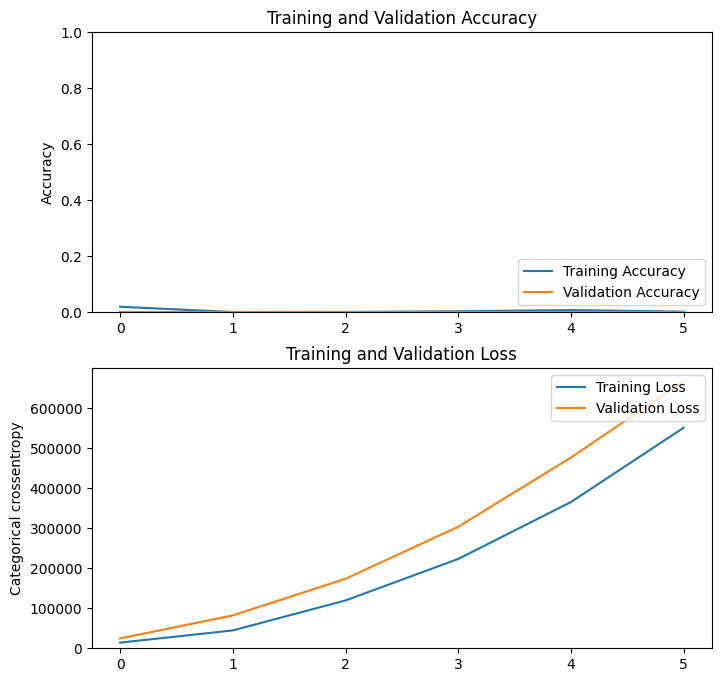

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical crossentropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(audio_test, text_test)

## **Model Predictions**

In [ ]:
predict = model.predict(audio_test)
print(predict)

In [ ]:
print(predict.ndim)

In [ ]:
print(len(predict))

## **Decoding Model Predictions**

In [ ]:
import numpy as np

def greedy_decode(pred):
    # Convert softmax probabilities to predicted character indices
    char_indices = np.argmax(pred, axis=-1)

    # Map indices back to characters using your character mapping or TextTransform
    predicted_text = text_transform.num_to_char(char_indices)

    return predicted_text


In [ ]:
# Decode the predictions using greedy decoding
predicted_text = greedy_decode(predict)

print(predicted_text)

This code has been adapted from;
https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

In [ ]:
# dfgggggggcvggtfgggggwert
# asdf

In [ ]:
# sdfghjk cfghjkfghjkjh

In [ ]:
# fghj fghj kjmh ghj

In [ ]:
# sdfghvffgjfjfhf gjfjgj
print("test")
# cvbnmxasdfkjhzxcj

In [ ]:
# werggd
# print("Akosua") fghj
# ddsd

In [ ]:
# fghjklghhghtyjkhjk
# Hbczdjb
# dfghjkl
# jkl
# dfghjsdfgh